In [359]:
# https://keras.io/
!pip install -q keras
!pip install scikit-image
!pip install tensorflow

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense, Dropout, Flatten, Reshape, LocallyConnected2D, Conv2D, MaxPooling2D, UpSampling2D, Conv3D, MaxPooling3D, UpSampling3D
from keras.models import Sequential, Model
from keras import backend as K
import os.path
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.models import load_model
import h5py

/Users/mateuszochal/.virtualenvs/COMP6208venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def draw_images(images, shape = (28, 28), n=12):
    """
    params:
    > n: how many digits we will display
    """
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(shape))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## Loading datasets from keras
### If datasets available locally, skip this section

(60000, 28, 28, 1)
(10000, 28, 28, 1)


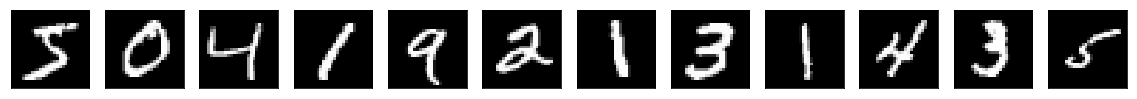

In [394]:
def load_mnist():
    # Load data
    from keras.datasets import mnist
    (x_train, _), (x_test, _) = mnist.load_data()
    
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), 28, 28, 1))
    x_test = x_test.reshape((len(x_test), 28, 28, 1))
    print (x_train.shape)
    print (x_test.shape)
    return x_train, x_test

x_train_mnist, x_test_mnist = load_mnist()
draw_images(x_train_mnist)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


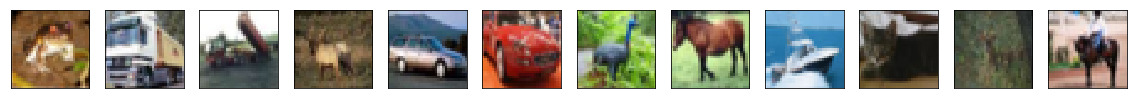

In [395]:
def load_cifar():
    from keras.datasets import cifar10
    (x_train, _), (x_test, _) = cifar10.load_data()

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    #   x_train = x_train.reshape((len(x_train), 32, 32, 3))
    #   x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    print(x_train.shape)
    print(x_test.shape)
    return x_train, x_test

x_train_cifar, x_test_cifar = load_cifar()
draw_images(x_train_cifar, shape=(32, 32, 3))

In [3]:
from time import sleep
import sys

def scale(x_train, scaled_shape=(14, 14, 1), original_shape=(28, 28, 1)):
    n = np.shape(x_train)[0]
    x_train_scaled = []
    for i, img in enumerate(x_train):
        x_train_scaled.append(resize(np.reshape(img, original_shape), scaled_shape, order=1, preserve_range=True, mode="constant"))
        if ((i+1)*100)%n == 0:
            sys.stdout.write('\r')
            sys.stdout.write("[%-20s] %d%%" % ('='*int((i+1)*20/n), int((i+1)*100/n)))
            sys.stdout.flush()
    x_train_scaled = np.array(x_train_scaled)
    print("\tShape:",np.shape(x_train_scaled))
    return x_train_scaled

In [10]:
# MNIST
print("Downscaling Mnist Train Dataset")
x_train_small_mnist = scale(x_train_mnist, scaled_shape=(14, 14, 1), original_shape=(28, 28, 1))
print("Downscaling Mnist Test Dataset")
x_test_small_mnist = scale(x_test_mnist, scaled_shape=(14, 14, 1), original_shape=(28, 28, 1))

Downscaling Mnist Train Dataset
[====================] 100%	Shape: (60000, 14, 14, 1)
Downscaling Mnist Test Dataset
[====================] 100%	Shape: (10000, 14, 14, 1)


In [12]:
print("Downscaling Cifar Train Dataset")
x_train_small_cifar = scale(x_train_cifar, scaled_shape=(16, 16, 3), original_shape=(32, 32, 3))
print("Downcaling Cifar Test Dataset")
x_test_small_cifar = scale(x_test_cifar, scaled_shape=(16, 16, 3), original_shape=(32, 32, 3))

Downscaling Cifar Train Dataset
[====================] 100%	Shape: (50000, 16, 16, 3)
Downcaling Cifar Test Dataset
[====================] 100%	Shape: (10000, 16, 16, 3)


In [13]:
# MNIST
# print("Upscaling Mnist Train Dataset")
# x_train_upscaled_mnist = scale(x_train_small_mnist, original_shape=(14, 14, 1), scaled_shape=(28, 28, 1))
# print("Upscaling Mnist Test Dataset")
# x_test_upscaled_mnist = scale(x_test_small_mnist, original_shape=(14, 14, 1), scaled_shape=(28, 28, 1))

print("Upscaling Cifar Train Dataset")
x_train_upscaled_cifar = scale(x_train_small_cifar, original_shape=(16, 16, 3), scaled_shape=(32, 32, 3))
print("Upscaling Cifar Test Dataset")
x_test_upscaled_cifar = scale(x_test_small_cifar, original_shape=(16, 16, 3), scaled_shape=(32, 32, 3))

Upscaling Cifar Train Dataset
[====================] 100%	Shape: (50000, 32, 32, 3)
Upscaling Cifar Test Dataset
[====================] 100%	Shape: (10000, 32, 32, 3)


In [15]:
np.save('x_train_mnist.npy', x_train_mnist) 
np.save('x_train_small_mnist.npy', x_train_small_mnist) 
np.save('x_train_upscaled_mnist.npy', x_train_upscaled_mnist)

np.save('x_train_cifar.npy', x_train_cifar) 
np.save('x_train_small_cifar.npy', x_train_small_cifar)
np.save('x_train_upscaled_cifar.npy', x_train_upscaled_cifar)

np.save('x_test_mnist.npy', x_test_mnist)
np.save('x_test_small_mnist.npy', x_test_small_mnist) 
np.save('x_test_upscaled_mnist.npy', x_test_upscaled_mnist) 

np.save('x_test_cifar.npy', x_test_cifar)
np.save('x_test_small_cifar.npy', x_test_small_cifar)
np.save('x_test_upscaled_cifar.npy', x_test_upscaled_cifar)

## Loading datasets from local file system
### If datasets available locally, skip to this section

In [4]:
x_train_mnist = np.load('x_train_mnist.npy')
x_train_small_mnist = np.load('x_train_small_mnist.npy')
x_train_upscaled_mnist = np.load('x_train_upscaled_mnist.npy')

x_train_cifar = np.load('x_train_cifar.npy')
x_train_small_cifar = np.load('x_train_small_cifar.npy')
x_train_upscaled_cifar = np.load('x_train_upscaled_cifar.npy')

x_test_mnist = np.load('x_test_mnist.npy')
x_test_small_mnist = np.load('x_test_small_mnist.npy')
x_test_upscaled_mnist = np.load('x_test_upscaled_mnist.npy')

x_test_cifar = np.load('x_test_cifar.npy')
x_test_small_cifar = np.load('x_test_small_cifar.npy')
x_test_upscaled_cifar = np.load('x_test_upscaled_cifar.npy')

## Visualise

Original training set Minst: 28 x 28


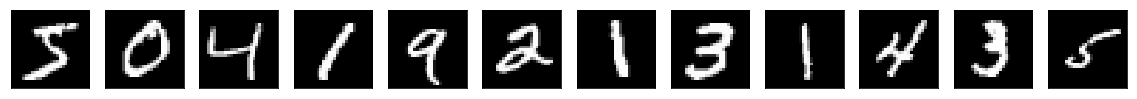

Smaller training set Minst: 14 x 14


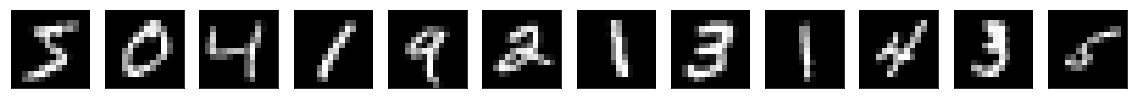

Autoupscaled training set Minst: 28 x 28


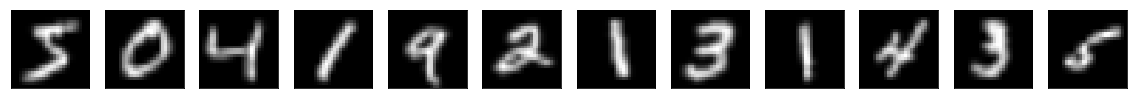

Original training set Cifar: 32 x 32


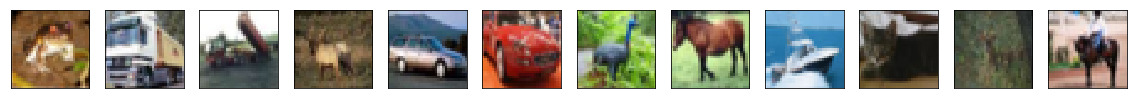

Smaller training set Cifar: 16 x 16


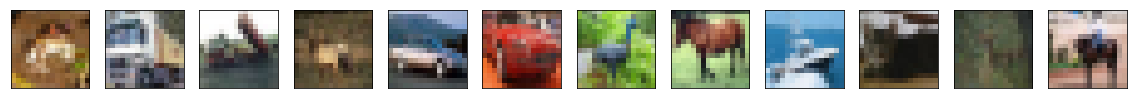

Autoupscaled training set Cifar: 32 x 32


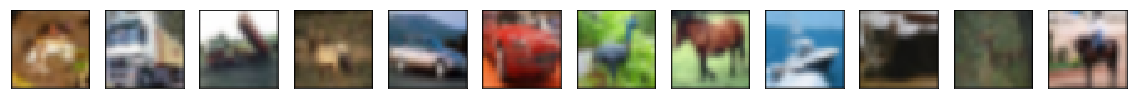

In [5]:
print("Original training set Minst: 28 x 28")
draw_images(x_train_mnist, shape=(28, 28))
print("Smaller training set Minst: 14 x 14")
draw_images(x_train_small_mnist, shape=(14, 14))
print("Autoupscaled training set Minst: 28 x 28")
draw_images(x_train_upscaled_mnist, shape=(28, 28))

print("Original training set Cifar: 32 x 32")
draw_images(x_train_cifar, shape=(32, 32, 3))
print("Smaller training set Cifar: 16 x 16")
draw_images(x_train_small_cifar, shape=(16, 16, 3))
print("Autoupscaled training set Cifar: 32 x 32")
draw_images(x_train_upscaled_cifar, shape=(32, 32, 3))

In [6]:
print("Mnist")
print(np.shape(x_train_mnist))
print(np.shape(x_train_small_mnist))
print(np.shape(x_train_upscaled_mnist))
print(np.shape(x_test_mnist))
print(np.shape(x_test_small_mnist))
print(np.shape(x_test_upscaled_mnist))
print("Cifar")
print(np.shape(x_train_cifar))
print(np.shape(x_train_small_cifar))
print(np.shape(x_train_upscaled_cifar))
print(np.shape(x_test_cifar))
print(np.shape(x_test_small_cifar))
print(np.shape(x_test_upscaled_cifar))

Mnist
(60000, 28, 28, 1)
(60000, 14, 14, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 14, 14, 1)
(10000, 28, 28, 1)
Cifar
(50000, 32, 32, 3)
(50000, 16, 16, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 16, 16, 3)
(10000, 32, 32, 3)


# Mnist: Basic CNN upscaler and descaler

In [7]:
from encoder_decoder import *

In [14]:
def basic_cnn_downscaler_mnist(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="basic_cnn_downscaler_mnist.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Conv2D(14, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            MaxPooling2D(pool_size=2),
            Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
        ])

        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
        
        upscaler.fit(x_train, y_train,
                          epochs=epochs,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

In [15]:
def basic_cnn_autoencoder_mnist(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="basic_cnn_autoencoder_mnist.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Conv2D(14, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            MaxPooling2D(pool_size=2),
            Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
            Conv2D(14, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            UpSampling2D((2, 2)),
            Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
        
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

In [23]:


def basic_dense_autoencoder_mnist(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="basic_dense_autoencoder_mnist.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Flatten(input_shape=input_image_dim),
            Dense((392), activation='relu'),
            Dense((196), activation='sigmoid'),
            Dense((392), activation='relu'),
            Dense((784), activation='sigmoid'),
            Reshape(target_shape = output_image_dim),
        ])

        upscaler.compile(optimizer='adam', loss='mean_squared_error')
        upscaler.summary()
        
        checkpoint = ModelCheckpoint("SRCNN_check_longer.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
        callbacks_list = [checkpoint]
        
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

## Train

In [24]:
# cnn upscaler
import time

ts = time.time()
my_basic_cnn_upscaler_mnist = basic_cnn_upscaler_mnist(
    x_train = x_train_small_mnist,
    y_train = x_train_mnist,
    x_test = x_test_small_mnist,
    y_test = x_test_mnist
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

# dense upscaler
ts = time.time()
my_basic_dense_upscaler_mnist = basic_dense_upscaler_mnist(
    x_train = x_train_small_mnist,
    y_train = x_train_mnist,
    x_test = x_test_small_mnist,
    y_test = x_test_mnist
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 14, 14, 14)        140       
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 28, 28, 14)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 1)         127       
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________
Time taken: 1.19
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 196)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 392)               77224     
_____________________________________________________________

In [25]:
# dense downscaler
ts = time.time()
my_basic_cnn_downscaler_mnist = basic_cnn_downscaler_mnist(
    x_train = x_train_mnist,
    y_train = x_train_small_mnist,
    x_test = x_test_mnist,
    y_test = x_test_small_mnist
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

# dense downscaler
ts = time.time()
my_basic_dense_downscaler_mnist = basic_dense_downscaler_mnist(
    x_train = x_train_mnist,
    y_train = x_train_small_mnist,
    x_test = x_test_mnist,
    y_test = x_test_small_mnist
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 1)         127       
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________
Time taken: 1.24
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 392)               307720    
_____________________________________________________________

In [26]:
# autoendocer upscaler
import time

ts = time.time()
my_basic_cnn_autoencoder_mnist = basic_cnn_autoencoder_mnist(
    x_train = x_train_mnist,
    y_train = x_train_mnist,
    x_test = x_test_mnist,
    y_test = x_test_mnist
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

# dense upscaler
ts = time.time()
my_basic_dense_autoencoder_mnist = basic_dense_autoencoder_mnist(
    x_train = x_train_mnist,
    y_train = x_train_mnist,
    x_test = x_test_mnist,
    y_test = x_test_mnist,
    epochs = 100,
    retrain= True
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 1)         127       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 14)        140       
_________________________________________________________________
up_sampling2d_19 (UpSampling (None, 28, 28, 14)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 28, 28, 1)         127       
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
Time taken: 

Epoch 55/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 56/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 57/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 58/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 59/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 60/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 61/100
60000/60000 [==============================] - 10s 171us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 62/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 63/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 64/100
60000/

## Results


(10000, 28, 28, 1)
Original


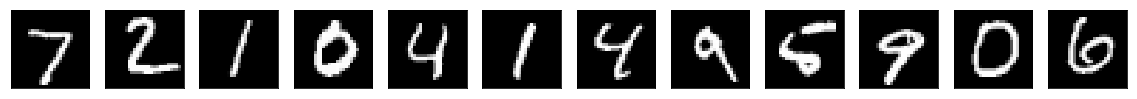

4 layer CNN Autoencoder


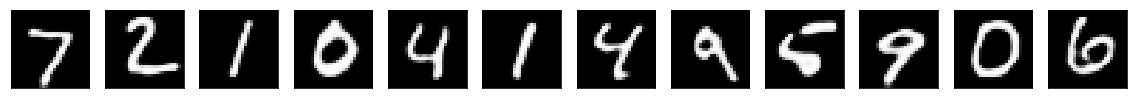

4 layer Dense Autoencoder


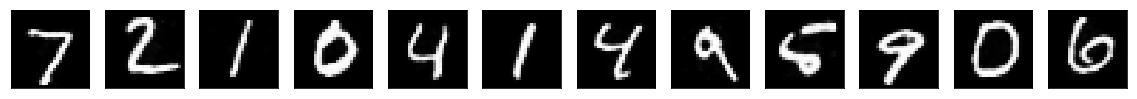

In [27]:
# print(np.shape(x_test_mnist))
# cnn_small_pred = my_basic_cnn_downscaler_mnist.predict(x_test_mnist)
# print(np.shape(cnn_small_pred))
# cnn_pred = my_basic_cnn_upscaler_mnist.predict(cnn_small_pred)

# print(np.shape(x_test_mnist))
# dense_small_pred = my_basic_dense_downscaler_mnist.predict(x_test_mnist)
# # print(np.shape(dense_small_pred))
# # dense_pred = my_basic_dense_upscaler_mnist.predict(dense_small_pred)

# print(np.shape(x_test_mnist))
# cnn_auto_pred = my_basic_cnn_autoencoder_mnist.predict(x_test_mnist)

print(np.shape(x_test_mnist))
dense_auto_pred = my_basic_dense_autoencoder_mnist.predict(x_test_mnist)

print("Original")
draw_images(x_test_mnist, shape=(28,28))

# print("CNN Predictions")
# draw_images(cnn_pred, shape=(28, 28))

# print("Dense Predictions")
# draw_images(dense_pred, shape=(28, 28))

print("4 layer CNN Autoencoder")
draw_images(cnn_auto_pred, shape=(28, 28))

print("4 layer Dense Autoencoder")
draw_images(dense_auto_pred, shape=(28, 28))

In [28]:
# mean squared error
from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_mnist, (-1, 784,))

print("CNN Predictions")
print(mean_squared_error(np.reshape(cnn_pred, (-1, 784,)), y))
print("Dense Predictions")
print(mean_squared_error(np.reshape(dense_pred, (-1, 784,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 784,)), y))
print("Dense Auto Predictions")
print(mean_squared_error(np.reshape(dense_auto_pred, (-1, 784,)), y))

CNN Predictions
0.0044970447
Dense Predictions
0.01627451
CNN Auto Predictions
0.00420971
Dense Auto Predictions
0.0011728315


### Findings

Again, there seems to be huge difference between the outputs of dense layers and CNN. The autoencoder is able to get gain lower error, but it not substantual so I'll move to Cifar data set and test the accuracy there.

# Basic CNN upscaler for Cifar

In [22]:
def basic_cnn_upscaler_cifar(x_train, x_test, x_train_downscaled, x_test_downscaled, epochs=400,
                            retrain=False, model_filename="basic_cnn_upscaler_cifar3_sub1.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
    else:
        input_shape = np.shape(x_train_downscaled)
#         x_train_downscaled = np.reshape(x_train_downscaled, (input_shape[0], np.prod(input_shape[1:])))
#         x_test_downscaled = np.reshape(x_test_downscaled, (np.shape(x_test_downscaled)[0], np.prod(input_shape[1:])))
#         x_train = np.reshape(x_train, (np.shape(x_train)[0], np.prod(input_shape[1:])))
#         x_test = np.reshape(x_test, (np.shape(x_test)[0], np.prod(input_shape[1:])))

        input_image_dim = np.shape(x_train_downscaled[0])
        print("Image dim: ", input_image_dim)

        conv1 = Conv2D(3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim, data_format="channels_last")
#         conv2 = Conv2D(64*3, (3, 3), activation='relu', padding='same', data_format="channels_last")
#         flat = Flatten(input_shape=input_image_dim)
        flat = Flatten()
        dense = Dense(np.prod(input_shape[1:]), activation='sigmoid')
        #       conv3 = Conv2D(90, (3, 3), activation='relu', padding='same', data_format="channels_last")
        #         conv2 = Conv2D(18, (3, 3), activation='relu', padding='same', data_format="channels_last")
#         upscaled1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same', data_format="channels_last")
#         upscaled2 = Conv2D(3, (3, 3), activation='sigmoid', padding='same', data_format="channels_last")
        reshape = Reshape(input_image_dim)
    
        upscaler = Sequential([conv1, flat, dense, reshape])
        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')

        print(x_train_downscaled.shape, np.shape(x_train))
        upscaler.summary()
        upscaler.fit(x_train_downscaled, x_train,
                          epochs=epochs,
                          batch_size=16,
                          shuffle=True,
                          validation_data=(x_test_downscaled, x_test))
        upscaler.save(model_filename)
        return upscaler

In [373]:
import encoder_decoder_cifar
from encoder_decoder_cifar import *

import importlib
importlib.reload(encoder_decoder_cifar)
from encoder_decoder_cifar import *

## Train

In [374]:
# cnn upscaler
import time

ts = time.time()
my_basic_cnn_upscaler_cifar = basic_cnn_upscaler_cifar(
    x_train = x_train_small_cifar,
    y_train = x_train_cifar,
    x_test = x_test_small_cifar,
    y_test = x_test_cifar,
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

ts = time.time()
my_basic_dense_upscaler_cifar = basic_dense_upscaler_cifar(
    x_train = x_train_small_cifar,
    y_train = x_train_cifar,
    x_test = x_test_small_cifar,
    y_test = x_test_cifar,
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

# cnn downscaler
ts = time.time()
my_basic_cnn_downscaler_cifar = basic_cnn_downscaler_cifar(
    x_train = x_train_cifar,
    y_train = x_train_small_cifar,
    x_test = x_test_cifar,
    y_test = x_test_small_cifar
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

# dense downscaler
ts = time.time()
my_basic_dense_downscaler_cifar = basic_dense_downscaler_cifar(
    x_train = x_train_cifar,
    y_train = x_train_small_cifar,
    x_test = x_test_cifar,
    y_test = x_test_small_cifar
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

# autoendocer autoencoder
import time
ts = time.time()
my_basic_cnn_autoencoder_cifar = basic_cnn_autoencoder_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

# dense autoencoder
ts = time.time()
my_basic_dense_autoencoder_cifar = basic_dense_autoencoder_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

SyntaxError: invalid syntax (<ipython-input-374-9f79abfb1972>, line 14)

In [225]:
print(np.shape(x_train_small_cifar))
print(np.shape(x_train_cifar))
print(np.shape(x_test_small_cifar))
print(np.shape(x_test_cifar))

(50000, 16, 16, 3)
(50000, 32, 32, 3)
(10000, 16, 16, 3)
(10000, 32, 32, 3)


## Results

In [ ]:
print("Original")
draw_images(x_test_cifar, shape=(32,32,3))
print("Upscaled")
draw_images(x_test_upscaled_cifar, shape=(32, 32, 3))

print(np.shape(x_test_cifar))
cnn_small_pred = my_basic_cnn_downscaler_cifar.predict(x_test_cifar)
print(np.shape(cnn_small_pred))
cnn_pred = my_basic_cnn_upscaler_cifar.predict(cnn_small_pred)

print(np.shape(x_test_cifar))
dense_small_pred = my_basic_dense_downscaler_cifar.predict(x_test_cifar)
print(np.shape(dense_small_pred))
dense_pred = my_basic_dense_upscaler_cifar.predict(dense_small_pred)

print(np.shape(x_test_cifar))
cnn_auto_pred = my_basic_cnn_autoencoder_cifar.predict(x_test_cifar)

print(np.shape(x_test_cifar))
dense_auto_pred = my_basic_dense_autoencoder_cifar.predict(x_test_cifar)

print("CNN Predictions")
draw_images(cnn_pred, shape=(32, 32, 3))

print("Dense Predictions")
draw_images(dense_pred, shape=(32, 32, 3))

print("Dense Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))

print("Dense Auto Predictions")
draw_images(dense_auto_pred, shape=(32, 32, 3))

In [233]:
from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32*32,))

print("CNN Predictions")
print(mean_squared_error(np.reshape(cnn_pred, (-1, 32*32,)), y))
print("Dense Predictions")
print(mean_squared_error(np.reshape(dense_pred, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("Dense Auto Predictions")
print(mean_squared_error(np.reshape(dense_auto_pred, (-1, 32*32,)), y))

CNN Predictions
0.00580284
Dense Predictions
0.044923563
CNN Auto Predictions
0.006867732
Dense Auto Predictions
0.03973781


### result findings

There seems to be a huge difference again between the results, a fully connected layer compared with a CNN, A CNN gives nice results, whereas dense is not very good. This time arround training the encoder and decoder seperalty seems to have improved the results. Things to investigate: 
1. does training the networks for longer improve the result? 
2. does training the networks with more convolution layers help?
3. does training the networks with a different loss function improve the results?
4. does adding a dense layer to the end improve anything?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 42)        1176      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 42)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 3)         1137      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 42)        1176      
_________________________________________________________________
up_sampling2d_24 (UpSampling (None, 32, 32, 42)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 3)         1137      
Total params: 4,626
Trainable params: 4,626
Non-trainable params: 0
_________________________________________________________________
Original

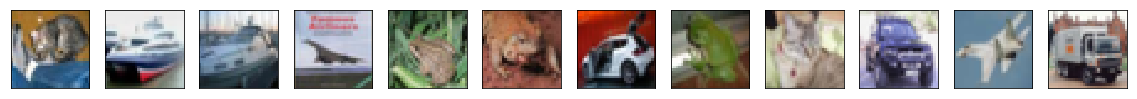

CNN Auto Predictions


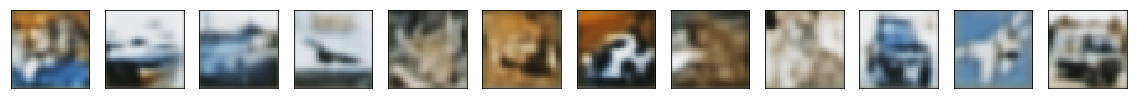

CNN Auto (cont.) Predictions


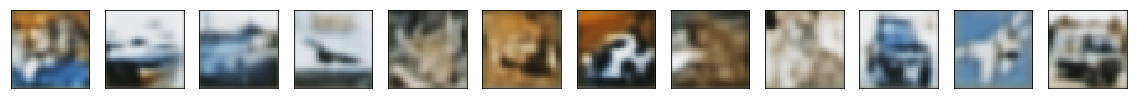

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.006867732


In [239]:
# training the CNN autoencoder for longer (decreased batch size to 32)

def basic_cnn_autoencoder_cifar_continue(x_train, y_train, x_test, y_test, epochs=10):
    model_filename="basic_cnn_autoencoder_cifar.h5"
    
    if os.path.isfile("basic_cnn_autoencoder_cifar_continued.h5"):
        upscaler = load_model(model_filename)
        upscaler.summary()
        
    elif os.path.isfile(model_filename):
        upscaler = load_model(model_filename)
        upscaler.summary()
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=32,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename[:-3] + "_continued.h5")
    else:
        raise Exception("file not found")
    return upscaler

my_basic_cnn_autoencoder_cifar_continued = basic_cnn_autoencoder_cifar_continue(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

cnn_auto_cont_pred = my_basic_cnn_autoencoder_cifar_continued.predict(x_test_cifar)
cnn_auto_pred = my_basic_cnn_autoencoder_cifar.predict(x_test_cifar)

from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32*32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(cnn_auto_cont_pred, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(cnn_auto_cont_pred, (-1, 32*32,)), y))

### Result: training for longer does not make a slightest of differences

In [242]:
# 2. does training the networks with more convolution layers help?

# adding layers, total layers (L) = 6
def cnn_autoencoder_L6_cifar(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="cnn_autoencoder_L6_cifar.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            MaxPooling2D(pool_size=2),
            Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            UpSampling2D((2, 2)),
            Conv2D(3, (3, 3), activation='sigmoid', padding='same')
        ])

        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
        
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

my_basic_cnn_autoencoder_L6_cifar = cnn_autoencoder_L6_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 32, 32, 42)        1176      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 32, 32, 42)        15918     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 42)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 3)         1137      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 42)        1176      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 42)        15918     
_________________________________________________________________
up_sampling2d_25 (UpSampling (None, 32, 32, 42)        0         
__________

Original


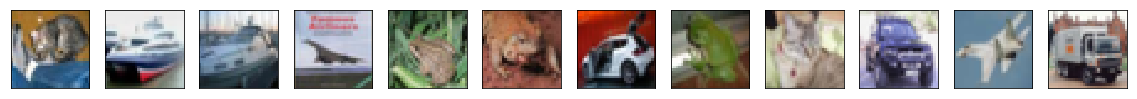

CNN Auto Predictions


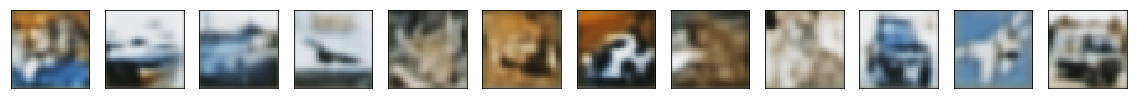

CNN Auto (cont.) Predictions


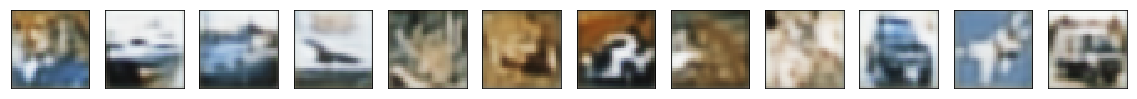

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.008450005


In [375]:
cnn_auto_pred_L6_cifar = my_basic_cnn_autoencoder_L6_cifar.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(cnn_auto_pred_L6_cifar, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred_L6_cifar, (-1, 32*32,)), y))

### Results: no, adding deeper layers does not improve the result.

In [245]:
# 2. does training the networks with more node in the convolution layers help?

# adding layers, total layers (L) = 6
def cnn_autoencoder_L4_cifar(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="cnn_autoencoder_L4_cifar.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Conv2D(14*3*2, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            MaxPooling2D(pool_size=2),
            Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
            Conv2D(14*3*2, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            UpSampling2D((2, 2)),
            Conv2D(3, (3, 3), activation='sigmoid', padding='same')
        ])

        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
        
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

my_cnn_autoencoder_L4_cifar = cnn_autoencoder_L4_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

(32, 32, 3) (32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 32, 32, 84)        2352      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 84)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 3)         2271      
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 84)        2352      
_________________________________________________________________
up_sampling2d_27 (UpSampling (None, 32, 32, 84)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 32, 32, 3)         2271      
Total params: 9,246
Trainable params: 9,246
Non-trainable params: 0
__________________________________________________

Original


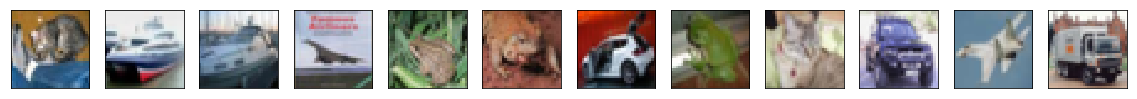

CNN Auto Predictions


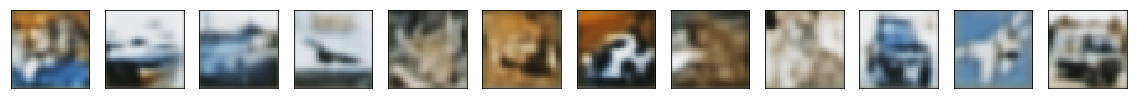

CNN Auto (cont.) Predictions


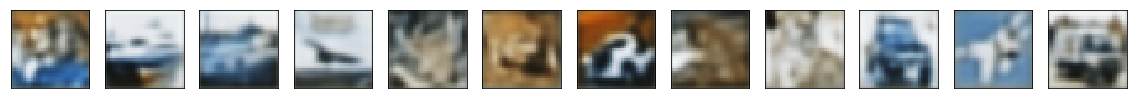

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.0072864913


In [247]:
cnn_auto_pred_L4_cifar = my_cnn_autoencoder_L4_cifar.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(cnn_auto_pred_L4_cifar, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred_L4_cifar, (-1, 32*32,)), y))

### Seems like there might be something fundamentally wrong with the architecture

In [350]:
# 3.75. does training the networks with more node in the convolution layers help?

# adding layers, total layers (L) = 5 with dense layers instead of max pooling and upsampling
def cnn_autoencoder_L5_with_dense_cifar(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="cnn_autoencoder_L5_with_dense_cifar.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_image_dim, data_format="channels_last"),  
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            
            Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_image_dim, data_format="channels_last"),  
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            
            Flatten(),
            Dense((16*16*3), activation='sigmoid'),
            Dropout(0.5),
            
            Dense((32*16*3), activation='relu'),
            Dropout(0.5),
            
            Dense((32*32*3), activation='sigmoid'),
            Dropout(0.5),
            Reshape(target_shape = (32, 32, 3)),
        ])

        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
#         return None
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

my_cnn_autoencoder_L5_with_dense_cifar = cnn_autoencoder_L5_with_dense_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

(32, 32, 3) (32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_249 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_99 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_125 (Flatten)        (None, 2048)           

## How to calculate the number of nodes in CNN layer
suppose:

input = (32, 32, 3)

Conv2D(32, (3, 3))

then params:

= (kernal size \* kernal size \* input channels + bias) \* (n of kernels)

= (3 \* 3 \* 3 + 1) \* 32 = 896

Original


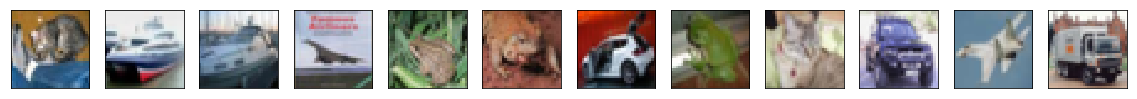

CNN Auto Predictions


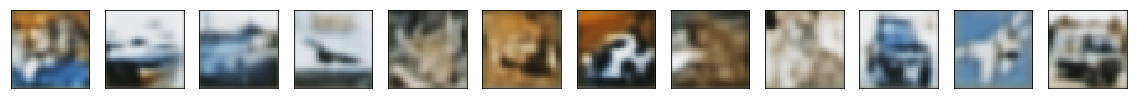

CNN Auto (cont.) Predictions


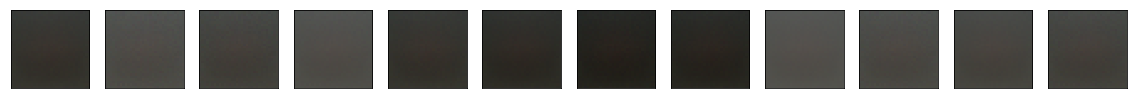

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.11012326


In [352]:
# cnn_auto_pred_L5_cifar = my_cnn_autoencoder_L5_with_dense_cifar.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(cnn_auto_pred_L5_cifar, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred_L5_cifar, (-1, 32*32,)), y))

In [357]:
# That is a big loss

In [385]:
# 3.875. does training the networks with more node in the convolution layers help?

# adding layers, total layers (L) = 5 with dense layers instead of max pooling and upsampling
def cnn_autoencoder_L3_with_dense_cifar(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="cnn_autoencoder_L3_with_dense_cifar.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            LocallyConnected2D(4, (3, 3), input_shape=input_image_dim, data_format="channels_last"),
            MaxPooling2D(pool_size=(2, 2)),
#             Dropout(0.25),
            
#             Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_image_dim, data_format="channels_last"),  
#             MaxPooling2D(pool_size=(2, 2)),
#             Dropout(0.25),
            Flatten(),
            Dense((16*16*3), activation='sigmoid'),
#             Dropout(0.5),
#             Dense((32*16*3), activation='relu'),
#             Dropout(0.5),
            Dense((32*32*3), activation='sigmoid'),
#             Dropout(0.25),
            Reshape(target_shape = (32, 32, 3)),
        ])

        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
#         return None
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

my_cnn_autoencoder_L3_with_dense_cifar = cnn_autoencoder_L3_with_dense_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

(32, 32, 3) (32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected2d_4 (Local (None, 30, 30, 4)         100800    
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 15, 15, 4)         0         
_________________________________________________________________
flatten_130 (Flatten)        (None, 900)               0         
_________________________________________________________________
dense_262 (Dense)            (None, 768)               691968    
_________________________________________________________________
dense_263 (Dense)            (None, 3072)              2362368   
_________________________________________________________________
reshape_94 (Reshape)         (None, 32, 32, 3)         0         
Total params: 3,155,136
Trainable params: 3,155,136
Non-trainable params: 0
__________________________________________

Original


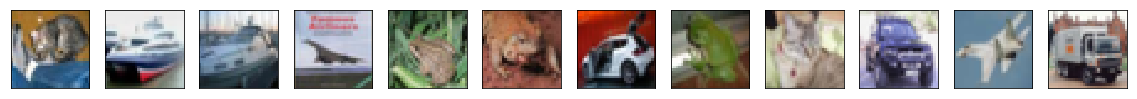

CNN Auto Predictions


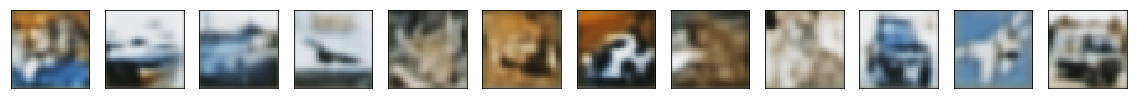

CNN Auto (cont.) Predictions


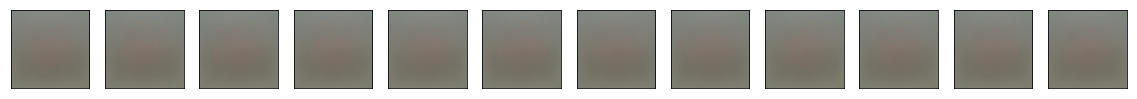

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.061703715


In [386]:
cnn_auto_pred_L3_cifar = my_cnn_autoencoder_L3_with_dense_cifar.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(cnn_auto_pred_L3_cifar, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred_L3_cifar, (-1, 32*32,)), y))

In [408]:
# 3.875. does training the networks with more node in the convolution layers help?

# adding layers, total layers (L) = 7 with dense layers instead of max pooling and upsampling
def cnn_autoencoder_L7_with_dense_cifar(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="cnn_autoencoder_L7_with_dense_cifar.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim),
            MaxPooling2D(pool_size=(2,2)),
            
            Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
            
            Flatten(),
            Dense((16*16*3), activation='sigmoid'),
            Reshape(target_shape = (16, 16, 3)),
            
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            
            UpSampling2D((2, 2)),
            
            Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
            
            Flatten(),
            Dense((32*32*3), activation='sigmoid'),
            Reshape(target_shape = (32, 32, 3)),
        ])

        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
#         return None
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

my_cnn_autoencoder_L7_with_dense_cifar = cnn_autoencoder_L7_with_dense_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_251 (Conv2D)          (None, 32, 32, 42)        1176      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 16, 42)        0         
_________________________________________________________________
conv2d_252 (Conv2D)          (None, 16, 16, 3)         1137      
_________________________________________________________________
flatten_131 (Flatten)        (None, 768)               0         
_________________________________________________________________
dense_264 (Dense)            (None, 768)               590592    
_________________________________________________________________
reshape_95 (Reshape)         (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 16, 16, 42)        1176      
__________

Original


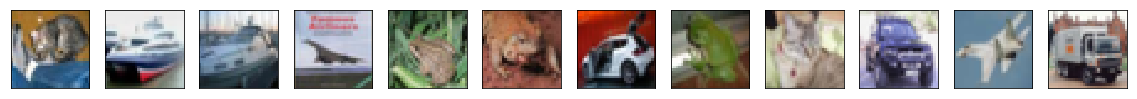

CNN Auto Predictions


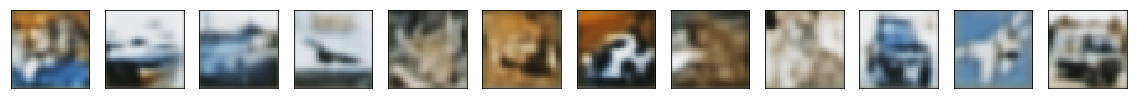

CNN Auto (cont.) Predictions


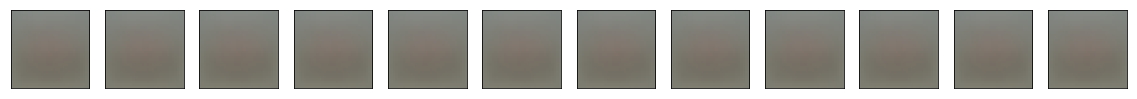

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.06177977


In [413]:
cnn_auto_pred_L7_cifar = my_cnn_autoencoder_L7_with_dense_cifar.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(cnn_auto_pred_L7_cifar, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred_L7_cifar, (-1, 32*32,)), y))

In [ ]:
# 3.875. does training the networks with more node in the convolution layers help?

# adding layers, total layers (L) = 7 with dense layers instead of max pooling and upsampling
def cnn_autoencoder_L7_with_dense_cifar(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="cnn_autoencoder_L7_with_dense_cifar.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        upscaler = Sequential([
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim),
            MaxPooling2D(pool_size=(2,2)),
            
            Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
            
            Flatten(),
            Dense((16*16*3), activation='sigmoid'),
            Reshape(target_shape = (16, 16, 3)),
            
            Conv2D(14*3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim), 
            
            UpSampling2D((2, 2)),
            
#             Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
            
            Flatten(),
            Dense((32*32*3), activation='sigmoid'),
            Reshape(target_shape = (32, 32, 3)),
        ])

        upscaler.compile(optimizer='adam', loss='mean_squared_error')
        upscaler.summary()
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        upscaler.save(model_filename)
    return upscaler

my_cnn_autoencoder_L7_with_dense_cifar = cnn_autoencoder_L7_with_dense_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

### Repeating the experiments with a small encoder deconder network

In [419]:
def basic_dense_autoencoder_cifar2(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="basic_dense_autoencoder_cifar2.h5"):
    if not os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
#         upscaler = Sequential([
#             Flatten(input_shape=input_image_dim),
#             Dense((16*16*3), activation='relu'),
#             Dense((32*32*3), activation='relu'),
#             Reshape(target_shape = output_image_dim),
#         ])
        upscaler = load_model(model_filename)
#         upscaler.compile(optimizer='adam', loss='mean_squared_error')
        upscaler.summary()
        
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        
        upscaler.save(model_filename)
    return upscaler

my_basic_dense_autoencoder_cifar2 = basic_dense_autoencoder_cifar2(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

(32, 32, 3) (32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_134 (Flatten)        (None, 3072)              0         
_________________________________________________________________
dense_268 (Dense)            (None, 768)               2360064   
_________________________________________________________________
dense_269 (Dense)            (None, 3072)              2362368   
_________________________________________________________________
reshape_98 (Reshape)         (None, 32, 32, 3)         0         
Total params: 4,722,432
Trainable params: 4,722,432
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 2/5
50000/50000 [==============================] - 49s 985us/step - loss: 0.0075

Original


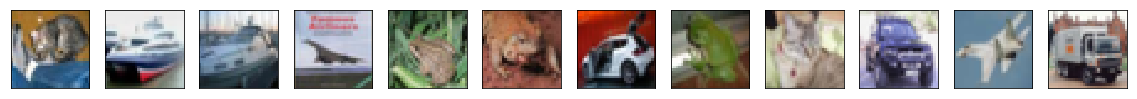

CNN Auto Predictions


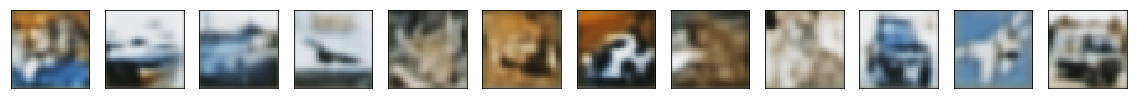

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CNN Auto (cont.) Predictions


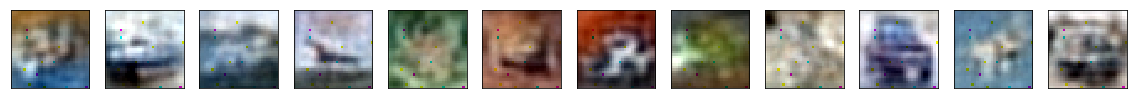

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.007544893


In [420]:
dense_autoencoder_cifar2 = my_basic_dense_autoencoder_cifar2.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(dense_autoencoder_cifar2, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(dense_autoencoder_cifar2, (-1, 32*32,)), y))

### It leaves artefacts, so I combine it with a convolution 

In [434]:
from keras.layers import Add

def basic_dense_cnn_combined_autoencoder_cifar(x_train, y_train, x_test, y_test, epochs=5,
                            retrain=False, model_filename="basic_dense_cnn_combined_autoencoder_cifar.h5"):
    if not os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
#         input_image_dim= np.shape(x_train[0])
#         output_image_dim = np.shape(y_train[0])
#         print(input_image_dim, output_image_dim)
        
#         input_model = Input(shape=output_image_dim)
        
#         dense = Flatten()(input_model)
#         dense = Dense((16*16*3), activation='relu')(dense)
#         dense = Dense((32*32*3), activation='relu')(dense)
#         dense = Reshape(target_shape = output_image_dim)(dense)
        
#         cnn = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_image_dim)(input_model)
#         cnn = MaxPooling2D(pool_size=2)(cnn)
#         cnn = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(cnn)
#         cnn = UpSampling2D((2, 2))(cnn)
#         cnn = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(cnn)
        
#         cnn = Conv2D(2, (3, 3), activation='sigmoid', padding='same')
#         cnn = MaxPooling2D(pool_size=2)
#         cnn = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_image_dim)
        
#         added = Add()([dense, cnn])
#         upscaler = Model(inputs=[input_model], outputs=added)
        
        upscaler = load_model(model_filename)
#         upscaler = upscaler(input_model)
        
#         dense = Dense(32*32*3, activation='relu', activity_regularizer=activity_l1(1e-5))(upscaler)
#         dense = Dense(32*32*3, activation='relu', activity_regularizer=activity_l1(1e-5))(upscaler)
        
#         upscaler.compile(optimizer='adam', loss='mean_squared_error')
        upscaler.summary()
        
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        
        upscaler.save(model_filename)
    return upscaler

my_basic_dense_cnn_combined_autoencoder_cifar = basic_dense_cnn_combined_autoencoder_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_259 (Conv2D)             (None, 32, 32, 16)   448         input_24[0][0]                   
__________________________________________________________________________________________________
flatten_137 (Flatten)           (None, 3072)         0           input_24[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_76 (MaxPooling2D) (None, 16, 16, 16)   0           conv2d_259[0][0]                 
__________________________________________________________________________________________________
dense_274 

KeyboardInterrupt: 

In [431]:
# the number of parameters vs the size of the image:
# Suppose that 32bit float is used, and suppose the images are recoded using 8bits 
# We need 4723399*32 / (32*32*3*8) = 6,150 images in order for it to be worth it. 

Original


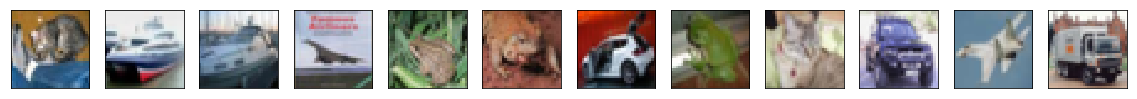

CNN Auto Predictions


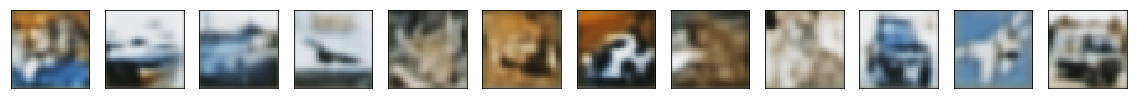

CNN Auto (cont.) Predictions


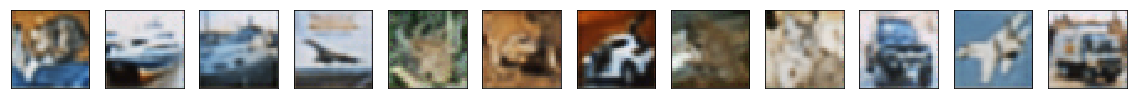

Original
0.0
CNN Auto Predictions
0.006867732
CNN Auto (cont.) Predictions
0.0034764705


In [432]:
dense_cnn_combined_autoencoder_cifar = my_basic_dense_cnn_combined_autoencoder_cifar.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))
print("CNN Auto Predictions")
draw_images(cnn_auto_pred, shape=(32, 32, 3))
print("CNN Auto (cont.) Predictions")
draw_images(dense_cnn_combined_autoencoder_cifar, shape=(32, 32, 3))

print("Original")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))
print("CNN Auto Predictions")
print(mean_squared_error(np.reshape(cnn_auto_pred, (-1, 32*32,)), y))
print("CNN Auto (cont.) Predictions")
print(mean_squared_error(np.reshape(dense_cnn_combined_autoencoder_cifar, (-1, 32*32,)), y))

### There is considerable improvement
The images seem to be sharper, trained for 15 episodes

In [433]:
# To try next, a similar idea but with seperated decoder and encoder

In [444]:
from keras.layers import Add, AveragePooling2D
from keras.regularizers import l1
from keras.layers import deserialize as layer_from_config

def dense_cnn_combined_autoencoder_cifar(x_train, y_train, x_test, y_test, epochs=15,
                            retrain=False, model_filename="dense_cnn_combined_autoencoder_cifar.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train[0])
        output_image_dim = np.shape(y_train[0])
        print(input_image_dim, output_image_dim)
        
        input_model = Input(shape=output_image_dim)
        
        dense = Flatten()(input_model)
        dense = Dense(16*16*3, activation='relu', activity_regularizer=l1(1e-5))(dense)
        dense = Dense(32*32*3, activation='relu', activity_regularizer=l1(1e-5))(dense)
        dense = Reshape(target_shape = output_image_dim)(dense)
        
        cnn = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_image_dim)(input_model)
        cnn = AveragePooling2D(pool_size=2)(cnn)
        cnn = Conv2D(16, (3, 3), activation='sigmoid', padding='same')(cnn)
        cnn = UpSampling2D((2, 2))(cnn)
        cnn = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(cnn)
        
        added = Add()([dense, cnn])
        upscaler = Model(inputs=[input_model], outputs=added)
        upscaler.compile(optimizer='adam', loss='mean_squared_error')
        upscaler.summary()
        
        upscaler.fit(x_train, y_train,
                     epochs=epochs,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test, y_test))
        
        upscaler.save(model_filename)
    return upscaler

my_dense_cnn_combined_autoencoder_cifar = dense_cnn_combined_autoencoder_cifar(
    x_train = x_train_cifar,
    y_train = x_train_cifar,
    x_test = x_test_cifar,
    y_test = x_test_cifar
)

(32, 32, 3) (32, 32, 3)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_269 (Conv2D)             (None, 32, 32, 16)   448         input_29[0][0]                   
__________________________________________________________________________________________________
flatten_142 (Flatten)           (None, 3072)         0           input_29[0][0]                   
__________________________________________________________________________________________________
average_pooling2d_3 (AveragePoo (None, 16, 16, 16)   0           conv2d_269[0][0]                 
_____________________________________________________________________________________

In [ ]:
dense_cnn_combined_autoencoder_cifar_2 = my_dense_cnn_combined_autoencoder_cifar.predict(x_test_cifar)
dense_cnn_combined_autoencoder_cifar = my_basic_dense_cnn_combined_autoencoder_cifar.predict(x_test_cifar)

# from sklearn.metrics import mean_squared_error
y = np.reshape(x_test_cifar, (-1, 32 * 32,))

print("Low resolution input")
draw_images(x_test_upscaled_cifar, shape=(32, 32, 3))
print("Plain 2 layer CNN Predictions")
draw_images(dense_cnn_combined_autoencoder_cifar, shape=(32, 32, 3))
print("CNN with Dense Predictions")
draw_images(dense_cnn_combined_autoencoder_cifar_2, shape=(32, 32, 3))
print("High resolution (ground truth)")
draw_images(x_test_cifar, shape=(32, 32, 3))

print("Low resolution input")
print(mean_squared_error(np.reshape(dense_cnn_combined_autoencoder_cifar, (-1, 32*32,)), y))
print("CNN with Dense Predictions")
print(mean_squared_error(np.reshape(dense_cnn_combined_autoencoder_cifar_2, (-1, 32*32,)), y))
print("High resolution (ground truth)")
print(mean_squared_error(np.reshape(x_test_cifar, (-1, 32*32,)), y))

In [447]:
# Peak single to noise ratio, structural similarity index
# Standerdised, get the dataset from Maciek